In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
loan_data = pd.read_csv(r'C:\Users\hp\My Project Files__\Loan_Approval_Data.csv')
loan_data.head().append(loan_data.tail())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
loan_data.shape

(614, 13)

In [5]:
loan_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loan_data.isnull().sum()

print(loan_data.nunique())

## Unique Values in Missing value columns 

print('Gender :',loan_data['Gender'].unique())
print("-"*80)

print('Married :',loan_data['Married'].unique())
print("-"*80)

print('Dependents :',loan_data['Dependents'].unique())
print("-"*80)

print('Self_Employed :',loan_data['Self_Employed'].unique())
print("-"*80)

print('Loan_Amount_Term :',loan_data['Loan_Amount_Term'].unique())
print("-"*80)

print('Credit_History :',loan_data['Credit_History'].unique())
print("-"*80)

print('LoanAmount :',loan_data['LoanAmount'].unique())
print("-"*80)

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64
Gender : ['Male' 'Female' nan]
--------------------------------------------------------------------------------
Married : ['No' 'Yes' nan]
--------------------------------------------------------------------------------
Dependents : ['0' '1' '2' '3+' nan]
--------------------------------------------------------------------------------
Self_Employed : ['No' 'Yes' nan]
--------------------------------------------------------------------------------
Loan_Amount_Term : [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
--------------------------------------------------------------------------------
Credit_History : [ 1.  0. nan]
-----------------------

In [10]:
loan_data.duplicated().sum()

0

In [11]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='Loan_Status'>

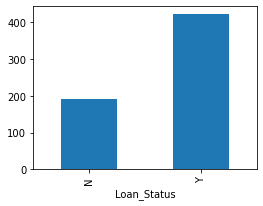

In [14]:
%matplotlib inline
GroupesData=loan_data.groupby('Loan_Status').size()
GroupesData.plot(kind='bar',figsize=(4,3))

In [15]:
loan_data.shape

(614, 13)

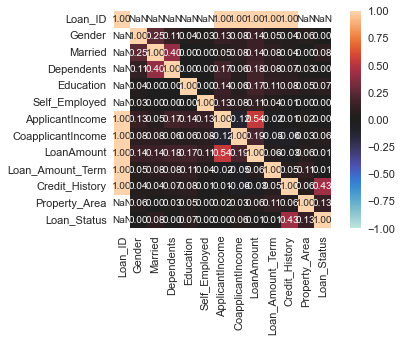

{'corr':                    Loan_ID    Gender   Married  Dependents  Education  \
 Loan_ID                1.0  0.000000  0.000000    0.000000   0.000000   
 Gender                 0.0  1.000000  0.254087    0.112696   0.040876   
 Married                0.0  0.254087  1.000000    0.398895   0.000000   
 Dependents             0.0  0.112696  0.398895    1.000000   0.000000   
 Education              0.0  0.040876  0.000000    0.000000   1.000000   
 Self_Employed          0.0  0.027410  0.000000    0.000000   0.000000   
 ApplicantIncome        1.0  0.129146  0.052127    0.168819   0.140760   
 CoapplicantIncome      1.0  0.084023  0.084375    0.057016   0.062290   
 LoanAmount             1.0  0.142637  0.140789    0.177850   0.173244   
 Loan_Amount_Term       1.0  0.052492  0.081227    0.079261   0.108857   
 Credit_History         1.0  0.040506  0.042911    0.068372   0.081637   
 Property_Area          0.0  0.061577  0.000000    0.032628   0.052455   
 Loan_Status            0.0  0

In [18]:
from dython.nominal import associations
associations(loan_data)

In [16]:
from autoviz import data_cleaning_suggestions
%matplotlib inline
data_cleaning_suggestions(loan_data)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Loan_ID,614,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
ApplicantIncome,505,int64,0,0.000000,82.247557,0,
CoapplicantIncome,287,float64,0,0.000000,46.742671,0,highly skewed: drop outliers or do box-cox transform
LoanAmount,203,float64,22,3.583062,33.061889,0,"fill missing, skewed: cap or drop outliers"
Loan_Amount_Term,10,float64,14,2.280130,1.628664,0,"fill missing, skewed: cap or drop outliers"
Dependents,4,object,15,2.442997,0.651466,51,"fill missing, fix mixed data types"
Property_Area,3,object,0,0.000000,0.488599,179,
Gender,2,object,13,2.117264,0.325733,112,"fill missing, fix mixed data types"
Married,2,object,3,0.488599,0.325733,213,"fill missing, fix mixed data types"
Education,2,object,0,0.000000,0.325733,134,


**After Doing Some Basic Data Analysis**
- Loan_ID: --> Rejected. This column does not affect the loan approval or rejection.
- Gender: --> Categorical. Selected. Missing value treatment required.**
- Married:--> Categorical. Selected. Missing value treatment required.**
- Dependents:--> Categorical. Selected. Missing value treatment required.**
- Education:--> Categorical. Selected.
- Self_Employed:--> Categorical. Selected.
- ApplicantIncome:--> Quantitative. Selected. Missing value treatment required.**
- CoapplicantIncome:--> Quantitative. Selected.
- LoanAmount: --> Quantitative. Selected. Missing value treatment required.**
- Loan_Amount_Term:--> Categorical. Selected. Missing value treatment required.**
- Credit_History: -->Categorical. Selected. Missing value treatment required.**
- Property_Area: -->Categorical. Selected.
- Loan_Status: -->Categorical. Selected. This is the Target Variable!

In [16]:
useless_columns= ['Loan_ID']
loan_data = loan_data.drop(useless_columns,axis=1)
loan_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [17]:
loan_data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


**Visual Exploratory Data Analysis**
- Catagorical Variable : Bar plot
- Continuous Varible : HIstogram

<font color='orange'>-Plotting multiple bar charts at once for categorical variables</font>

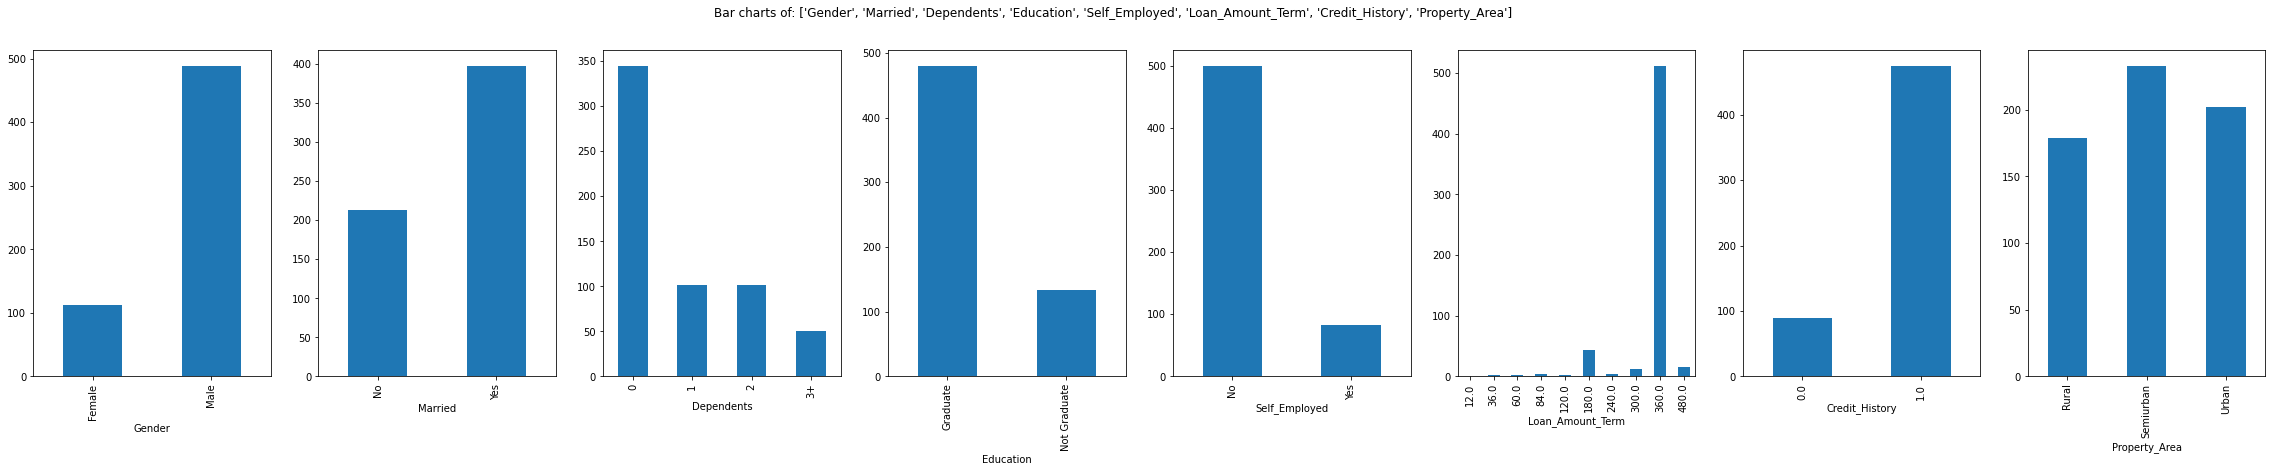

In [18]:
# im definig my own function

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


PlotBarCharts(inpData=loan_data, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

**BarChart Interpretation**

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

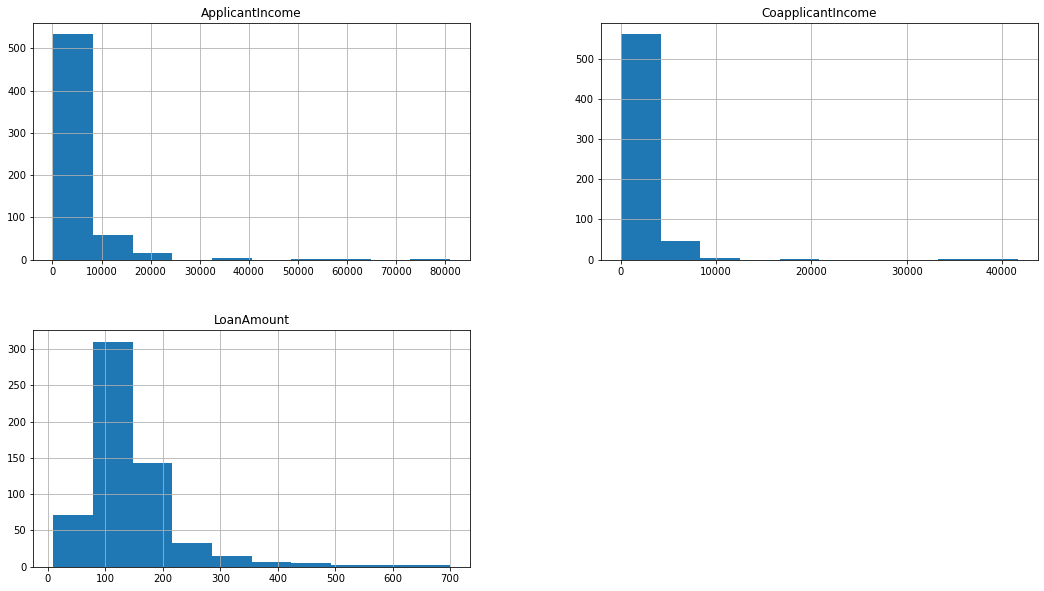

In [19]:
loan_data.hist(['ApplicantIncome','CoapplicantIncome','LoanAmount'],figsize=(18,10))

**HIstogram Interpretation : data distribution for a single continuous variable**
- The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "LoanAmount", there are around 320 rows in data that has a Loan Amount between 90 to 150.


### **Selected Continuous Variable**

- ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
- CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
- LoanAmount: Selected. Slightly skewed distribution, acceptable.

**Replacing Outliars for ApplcantIncome**


In [20]:
###### by finding nearest value to 30000 mark

loan_data['ApplicantIncome'][loan_data['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

In [21]:
# Replacing Outliars with Nearest possible value

loan_data["ApplicantIncome"][loan_data['ApplicantIncome']>30000]=23803

***Replacing outliars for CoapplicantIncome***

In [22]:
loan_data['CoapplicantIncome'][loan_data['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

Above result shows that nearest logical value 11300, hence replacing any above 15000 with it

In [23]:
loan_data['CoapplicantIncome'][loan_data['CoapplicantIncome']>15000]=11300

****Visualizing Distribution After Outliars tritment***
- the distribution has improved after the outliars tritment, there is still a tail but it is thick
 that means there are many values in that range, hence it is acceptable.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

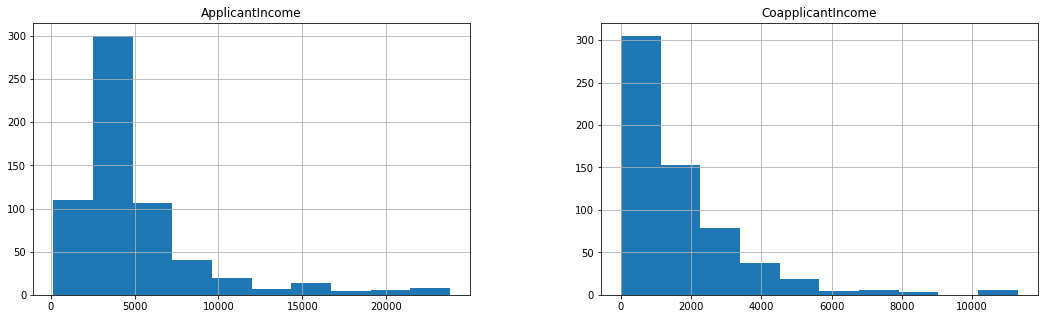

In [24]:
loan_data.hist(['ApplicantIncome','CoapplicantIncome'],figsize=(18,5))

In [25]:
###  Checking Mssing Value

loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Handling Missing Value using Mode for categorical feature**

In [26]:
loan_data['Gender'].fillna(loan_data["Gender"].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data["Married"].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data["Dependents"].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data["Self_Employed"].mode()[0],inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data["Loan_Amount_Term"].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data["Credit_History"].mode()[0],inplace=True)

# handling Missing value for contineous feature
loan_data['LoanAmount'].fillna(loan_data["LoanAmount"].median(),inplace=True)

In [27]:
## After handling missing value again chacking for missing value

loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Selecrion

In [28]:
loan_data.shape

(614, 12)

In [29]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5109.990228,1506.744169,145.752443,342.410423,0.855049
std,3995.354414,1936.455678,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,23803.000000,11300.000000,700.000000,480.000000,1.000000


**RelationShip Exploration - Categorical vs Continuous -- Using Box Plot//**

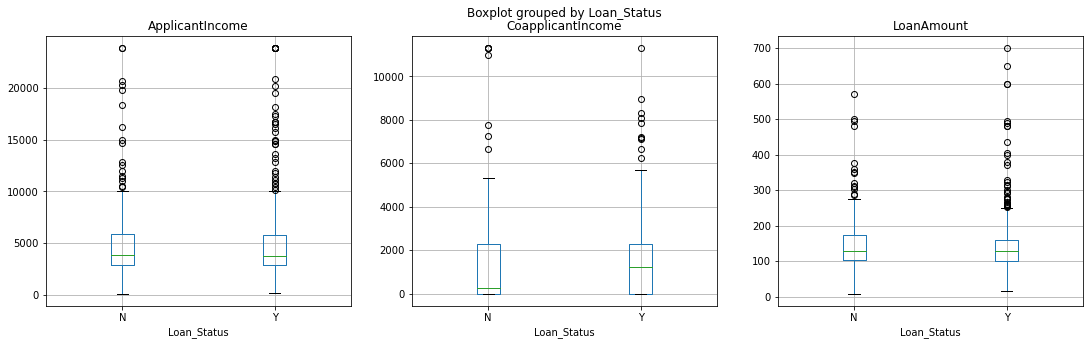

In [30]:
# BOx plot for Categorical Target Variale 'loan Status' and Continuous predictors

ContineousColsList = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

import matplotlib.pyplot as plt 
fig, PlotCanvas = plt.subplots(nrows =1,ncols=len(ContineousColsList), figsize=(18,5))

# Creating Box plot for each contineous predictors against the targeted varible 'Loan Status'

for PredictorCol , i in zip(ContineousColsList,range(len(ContineousColsList))):
    loan_data.boxplot(column=PredictorCol, by= 'Loan_Status',figsize= (5,5), vert=True, ax=PlotCanvas[i])

## Statistical Feature selection (Categorical vs Contineous)
**Using Annova Test**

In [31]:
# defining a function to find a statistical relation between all the categorical Variable

def FunctionAnnova(inpdata,TargetVariable, ContinuousPredictorsList):
    from scipy.stats import f_oneway
    
    #creating an empty list of final selected predictor
    SelectedPredictors=[]
    
    print(' ##### Annova Result ####\n')
    for predictor in ContinuousPredictorsList:
        CategoryGroupList = inpdata.groupby(TargetVariable)[predictor].apply(list)
        AnovaResult =f_oneway(*CategoryGroupList)
        
        # if Anova P-value is < 0.05 that means we reject H0
        if (AnovaResult[1]<0.05):
            print(predictor,'Is corelated with',TargetVariable,'|P-value:',AnovaResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor,'is not corelated with',TargetVariable,'|P-value:',AnovaResult[1])
    return (SelectedPredictors)

In [32]:
# here im calling the function to check which categorical variable are corelelated with target

ContinuousVariable = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
FunctionAnnova(inpdata = loan_data, TargetVariable='Loan_Status',
               ContinuousPredictorsList=ContinuousVariable)

 ##### Annova Result ####

ApplicantIncome is not corelated with Loan_Status |P-value: 0.9529534007092838
CoapplicantIncome is not corelated with Loan_Status |P-value: 0.6651120750168427
LoanAmount is not corelated with Loan_Status |P-value: 0.41132365467797827


[]

#**from above result it is confirm that our visualization using box plot above 
all three column are not correlated**

# Relationship Exploration : Categorical vs Categorical --
## Groupby Charts ||

**when the targeted variable is categorical and predicted variable is also categorical then the we explore correlation between them visually using boxplot and statastically by chisqure-test.**

In [33]:
#cross tabulation between two categorical variable 

CrossTabResult = pd.crosstab(index=loan_data['Gender'],columns=loan_data['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


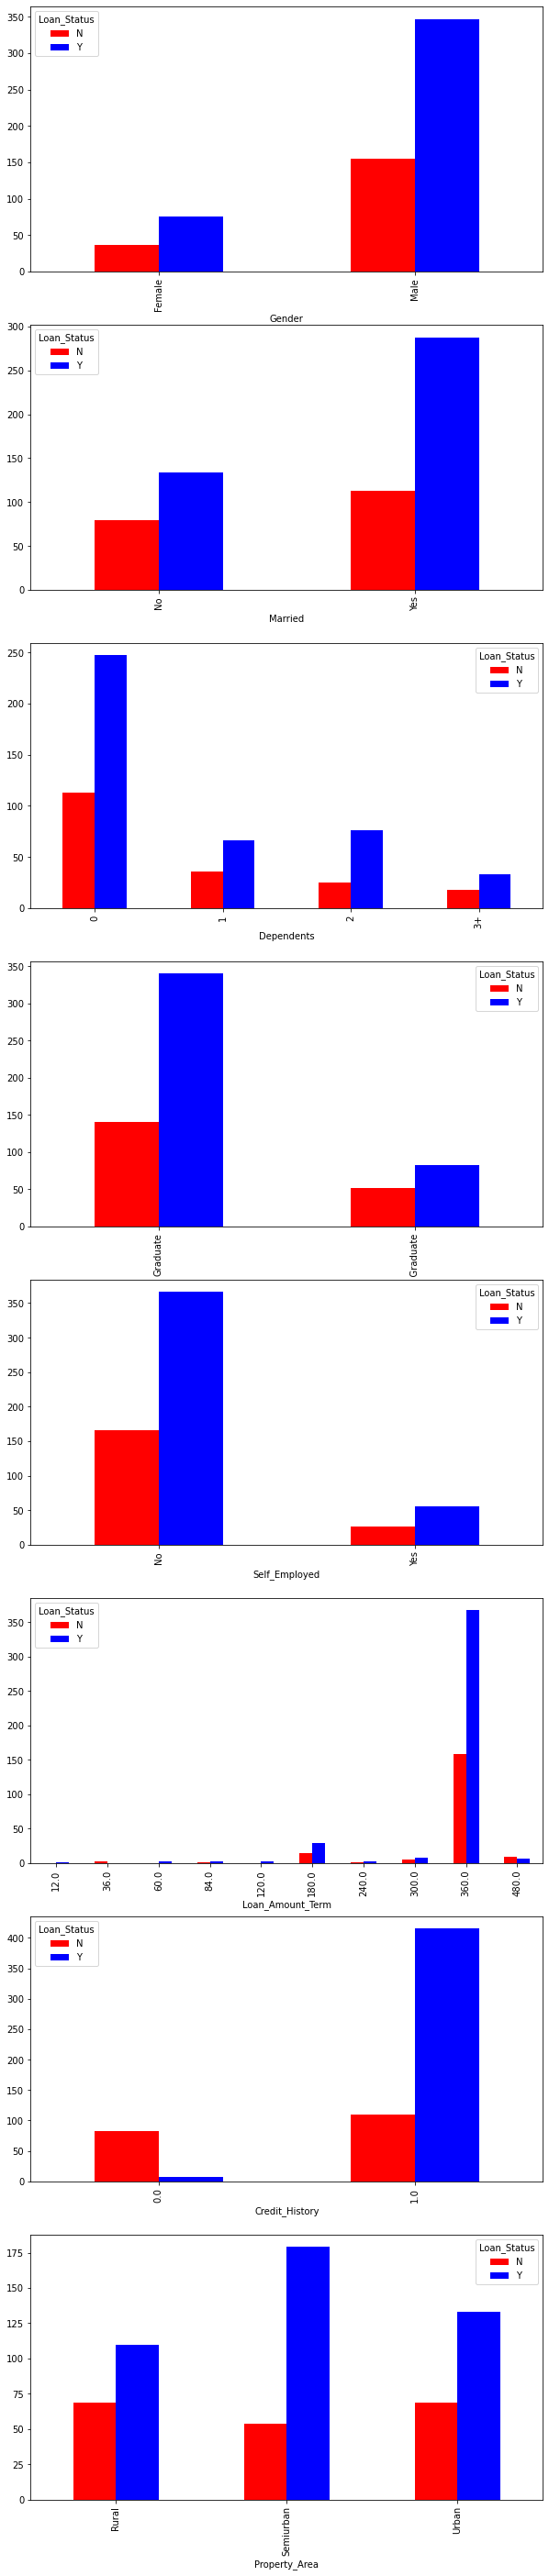

In [34]:
#visual interferance using group bar charts
CategoricalColsList= ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']
import matplotlib.pyplot as plt 
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# creating Group barplots for each categorical predictor for each Targeted predictors

for CategoricalCols, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult = pd.crosstab(index=loan_data[CategoricalCols],columns=loan_data['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'],ax=PlotCanvas[i])

## group BarCharts Interpretation
-These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Gender Vs Loan_Status plot. The approved vs rejected ratio for Males is similar to Females, it means Gender does not affect the Loan approval!. Hence, these two variables are not correlated.

On the other hand, look at the Credit_History vs Loan_Status plot. The number of approvals are very high if Credit_History=1.0. It means Credit_History affects the loan approval! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### **Statastical Feature Selection ( Categorical vs Categorical )** 
- Using CHi-Squre TEst

- Assumption (HO): The two columns are not releted to Result of Chisqure test the probability of HO being True.

In [35]:
# writing a function to check the correlation of all categorical variable with the Targeted variable.

def FunctionChisq(inpdata, TargetVariable ,CategoricalVariableList):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors = []
    
    for predictor in CategoricalVariableList:
        CrossTabResult = pd.crosstab(index=inpdata[TargetVariable],columns=inpdata[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1]<0.5):
            print(predictor,'  is corelated with ',TargetVariable,' | P-Value',ChiSqResult[1])
            SelectedPredictors.append(predictor)

        else:
            print(predictor,'  is Not corelated with ',TargetVariable,' | P-Value',ChiSqResult[1])

    return (SelectedPredictors)

CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [36]:
# Here calling the function  

FunctionChisq(inpdata=loan_data, 
              TargetVariable='Loan_Status' ,
              CategoricalVariableList=CategoricalVariables)

Gender   is Not corelated with  Loan_Status  | P-Value 0.7391461310869638
Married   is corelated with  Loan_Status  | P-Value 0.029608580862582116
Dependents   is corelated with  Loan_Status  | P-Value 0.3688663081366005
Education   is corelated with  Loan_Status  | P-Value 0.04309962129357355
Self_Employed   is Not corelated with  Loan_Status  | P-Value 1.0
Loan_Amount_Term   is corelated with  Loan_Status  | P-Value 0.13058516348934335
Credit_History   is corelated with  Loan_Status  | P-Value 3.4183499979091188e-40
Property_Area   is corelated with  Loan_Status  | P-Value 0.0021360187811644915


['Married',
 'Dependents',
 'Education',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

## Selecting the final predictors 
**On the basis of result selecting the final predictor columns for machine learnings.**

In [37]:
SelectedColumns = ['Married','Education','Credit_History','Property_Area']

#Selecting the final Columns
DataForML = loan_data[SelectedColumns]
DataForML.head().append(loan_data.tail())

,Married,Education,Credit_History,Property_Area,Gender,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,No,Graduate,1.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,Graduate,1.0,Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,Graduate,1.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yes,Not Graduate,1.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,Graduate,1.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,No,Graduate,1.0,Rural,Female,0,No,2900.0,0.0,71.0,360.0,Y
610,Yes,Graduate,1.0,Rural,Male,3+,No,4106.0,0.0,40.0,180.0,Y
611,Yes,Graduate,1.0,Urban,Male,1,No,8072.0,240.0,253.0,360.0,Y
612,Yes,Graduate,1.0,Urban,Male,2,No,7583.0,0.0,187.0,360.0,Y
613,No,Graduate,0.0,Semiurban,Female,0,Yes,4583.0,0.0,133.0,360.0,N


### Saving the Final data for Refrence During Deployment

In [38]:
DataForML.to_pickle('DataForML')

## Data Preprocessing For Machine Learning

- Converting each Ordinal Coulumns to Numeric
- Converting binary nominal Coulmns to numeric usung 1/10 mapping
- Converting all other nominal Columns to numeric using pandas get_dummies()
- Data Transformation/Standardisazion/Normalization/logarithmic Transformation. (if Required).
- 

**-Convering Binary Nominal Columns to numeric using 1/10 mapping**

In [39]:
# Treating the Binary Nominal Variable 
DataForML['Married'].replace({'Yes':1,'No':0},inplace =True)
DataForML['Education'].replace({'Graduate':1,'Not Graduate':0},inplace = True)

In [40]:
 # looking at Data After Nominal treatment

DataForML.head(3).append(DataForML.tail(3))

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
611,1,1,1.0,Urban
612,1,1,1.0,Urban
613,0,1,0.0,Semiurban


In [41]:
# Now Converting Nominal Variable to numeric using get_dummies()


# Treating all the nominal variable at once using get_dummies()
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable To data
DataForML_Numeric['Loan_Status'] = loan_data['Loan_Status']

# Printing Sample data
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


# ---MAchine Learning---
## -Spliting the data into training and testing-

we dont use the whole data for modelling we some data fro training and some data for testing
we will use 70% of data for traing perposse and 30% of data for testing perpose. 


In [42]:
# printing all the columns names for reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [43]:
# Seperating Targeted Variale and Predicting Variables
TargetVariable = 'Loan_Status'
Predictors = ['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

In [44]:
# Spliting the data into Training and Testing  set

from sklearn.model_selection import train_test_split
X_tarin,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=428)


## Standardize/Normalize the data 

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler = MinMaxScaler()
PredictorScalerFit = PredictorScaler.fit(X)  
X = PredictorScalerFit.transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
# Sanity Check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


# Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(C=1,penalty='l2',solver='newton-cg')
clf

LogisticRegression(C=1, solver='newton-cg')

In [48]:
# Creating a model on training data
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [49]:
# Measuring Accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [50]:
# printing Overall Accuracy of model
F1_score= metrics.f1_score(y_test, prediction,average='weighted')
print("Accuracy of model on testing Sample data : ",round(F1_score,2))

Accuracy of model on testing Sample data :  0.76


In [51]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


## Decision Tree 

In [52]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Hyperparameter Tunning 
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [53]:
# creating a model on training data

DTree = clf.fit(X_train,y_train)
prediction = DTree.predict(X_test)
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [54]:
# Measuring Accuracy on Testing Data 

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [55]:
# prenting the overall Accuracy of model

F1_score = metrics.f1_score(y_test, prediction,average= 'weighted')
print("Accuracy of model on testing Sample Data:",round(F1_score,2))

Accuracy of model on testing Sample Data: 0.76


<AxesSubplot:>

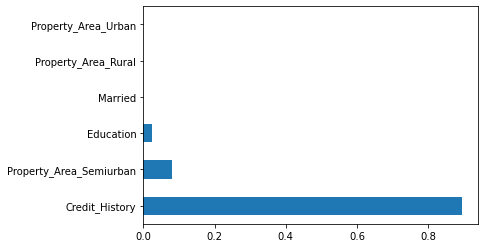

In [56]:
# ploting the feature importance for top 10 most import feature 
%matplotlib inline
feature_importance = pd.Series(DTree.feature_importances_, index = Predictors)
feature_importance.nlargest(10).plot(kind='barh')

In [57]:
# doing cross Validation 
from sklearn.model_selection import cross_val_score

# Running 10-fold cross validation on a given Algorithm 
# Passing full data X and y beacuse k fold will split the data and Automatically choose train/test
Accuracy_Values = cross_val_score(DTree,X,y,cv=10,scoring ='f1_weighted')
print("\nAccuracy value fro 10-fold Cross Validation :\n",Accuracy_Values)
print("\nFinal Average Accuracy of the model : ", round(Accuracy_Values.mean(),2))


Accuracy value fro 10-fold Cross Validation :
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model :  0.78



# Random Forest

In [58]:
# Random Forest ( Bagging Of Multiple Decision Tree)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100, criterion='gini')
clf

RandomForestClassifier(max_depth=2)

In [59]:
# Creating Model on traing Data

RF = clf.fit(X_train, y_train)
prediction = RF.predict(X_test)
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [60]:
# Measuring Accuracy on Testing Data

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [61]:
# Printing the overall Accuracy on the Model

F1_score = metrics.f1_score(y_test,prediction, average='weighted')
print('Accuracy of model on testing Sample Data',round(F1_score,2))

Accuracy of model on testing Sample Data 0.76


In [62]:
# Applying Cross Validation function importing from sklearn

from sklearn.model_selection import cross_val_score

# Rrunning 10-k cross validation on given algorithm 
# Passing full data because the k fold will split the data and automatically choose train/test 
Accuracy_Values = cross_val_score(RF,X,y,cv=10,scoring='f1_weighted')
print('\nAccuracy Value for 10-fold cross validation : \n',Accuracy_Values)
print("\nFinal Final Average Accuracy of MOdel : ",Accuracy_Values.mean(),2)


Accuracy Value for 10-fold cross validation : 
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Final Average Accuracy of MOdel :  0.7837334626268413 2


<AxesSubplot:>

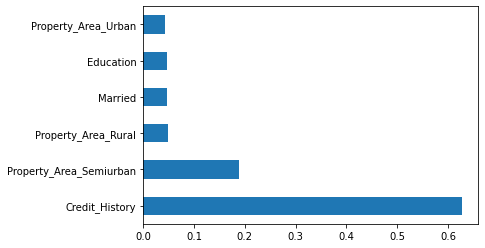

In [63]:
# plotting the feature importance of the top 10 most important columns

%matplotlib inline
feature_importance = pd.Series(RF.feature_importances_,index=Predictors)
feature_importance.nlargest(10).plot(kind='barh')

# AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with one level as the weak learner
DTC= DecisionTreeClassifier(max_depth=1)
clf= AdaBoostClassifier(n_estimators=500, base_estimator=DTC,learning_rate=0.01)
clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)

In [65]:
#creatng a model on training data

AB = clf.fit(X_train,y_train)
prediction= AB.predict(X_test)
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [66]:
# Measuring Accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [67]:
# printing the overall Accuracy of the model

F1_score = metrics.f1_score(y_test, prediction,average='weighted')
print('Accuracy of model on testing Sample Data :',round(F1_score,2))

Accuracy of model on testing Sample Data : 0.76


In [68]:
# importing cross validation Function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# passing overall data X and y beacause k-fold split the data and automatically select train/Test data
Accuracy_value = cross_val_score(AB, X, y, cv=10, scoring = 'f1_weighted')
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model :', round(Accuracy_Values.mean(),2))



Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model : 0.78


<AxesSubplot:>

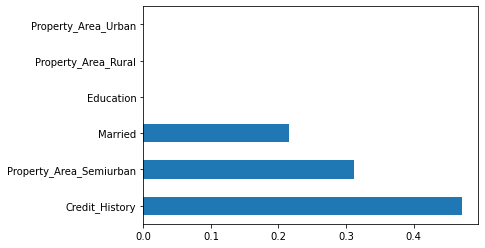

In [69]:
# Plotting the feature importance for Top 10 most important columns

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# KNN

In [70]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf 

KNeighborsClassifier(n_neighbors=3)

In [71]:
# creatign the model on training data 

KNN = clf.fit(X_train,y_train)
prediction = KNN.predict(X_test)

In [72]:
# Measuring Accuracy on Testing Data

from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [73]:
# printing the overall Accuracy of the model

F1_score = metrics.f1_score(y_test, prediction,average='weighted')
print('Accuracy of the model on testing sample data : ',round(F1_score,2))

Accuracy of the model on testing sample data :  0.76


In [74]:
# doing Cross Validation on algorithm 
from sklearn.model_selection import cross_val_score 

# running 10-fold cross validation on a given algorithm 
# PAssing the overall X and y data, K-fold will automatically split the data and into train and test.

Accuracy_value= cross_val_score(KNN, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy value for 10-fold cross validation : \n",Accuracy_value)
print('\nFinal Average Accuracy of the Model : ',round(Accuracy_value.mean(),2))


# we need to Plot the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN


Accuracy value for 10-fold cross validation : 
 [0.51567852 0.61246434 0.50743155 0.51554611 0.49356873 0.52017245
 0.63642832 0.55498411 0.57326796 0.62098361]

Final Average Accuracy of the Model :  0.56


# SVM

In [75]:
# importing the library

from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)
clf

SVC(C=3, gamma=0.1)

In [76]:
# Creating the model on training data
SVM = clf.fit(X_train,y_train)
prediction = SVM.predict(X_test)

# Measurung Accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test,prediction))

# Printing Overall Accuracy of the Model
F1_score = metrics.f1_score(y_test,prediction, average= 'weighted')
print("\nAccuracy of the model on Testing Sample Data : ",round(F1_score,2))


# cross validation
# Runnig 10-k fold cross validation on a given agorithm 
# Passing overall Data X and y cross validation will split the data automatically select train/test

from sklearn.model_selection import cross_val_predict
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]

Accuracy of the model on Testing Sample Data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


# Naive Bayes

In [77]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB,MultinomialNB

# GaussianNB will used in Binomial Classification 
# MultinomialNB will used in multi-class classification

clf = GaussianNB()
clf

GaussianNB()

In [78]:
NB= clf.fit(X_train,y_train)
predictions = NB.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [79]:
# Measurung Accuracy on Testing data

from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [80]:
# Printing Overall Accuracy
F1_score = metrics.f1_score(y_test,prediction,average ='weighted')
print(F1_score)

0.7564817361302097


In [81]:
# cross validation 
from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(NB,X,y,cv=10,scoring='f1_weighted')
print("\nAccuracy value for 10-k fold cross validation\n",Accuracy_Values)
print('\nFinal Average Accuracy of the MOde',round(Accuracy_Values.mean(),2))



Accuracy value for 10-k fold cross validation
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the MOde 0.78


In [82]:
print('\nFinal Average Accuracy of the Logistic MOde',round(Accuracy_Values.mean(),2))
print('\nFinal Average Accuracy of the Decision Tree Model : ',round(Accuracy_value.mean(),2))
print('\nFinal Average Accuracy of the Random Forest model :', round(Accuracy_Values.mean(),2))
print("\nFinal Final Average Accuracy of Adaboost MOdel : ",Accuracy_Values.mean(),2)
print("\nFinal Average Accuracy of the KNN model : ", round(Accuracy_Values.mean(),2))
print('\nFinal Average Accuracy of the SVM model:', round(Accuracy_Values.mean(),2))
print('\nFinal Average Accuracy of the Naive bayes model:', round(Accuracy_Values.mean(),2))



Final Average Accuracy of the Logistic MOde 0.78

Final Average Accuracy of the Decision Tree Model :  0.56

Final Average Accuracy of the Random Forest model : 0.78

Final Final Average Accuracy of Adaboost MOdel :  0.7837334626268413 2

Final Average Accuracy of the KNN model :  0.78

Final Average Accuracy of the SVM model: 0.78

Final Average Accuracy of the Naive bayes model: 0.78


**On the Basis of above conclusion we select Adaboost as Final Model**
- it is very Fast and I observed that it is using the predictors better by looking 
at its variable importance chart.
- And It is not letting a single predictor dominant the decision. Which is good.

# Deployment of model

###  Retraining the model using 100% Data.

In [83]:
# Adaboost.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using AdboosAlgorithm with the final Hyperparameter
# Using only 1 split decision tree which is a base modewhich is a weak model 

DTC = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC, learning_rate= 0.01)
FinalAdaboostModel= clf.fit(X,y)   # trainig data on 100 % data
FinalAdaboostModel

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)

### Saving the model as a seralized file which can be stored anywhere

In [84]:
import pickle
import os

with open("FinalAdaboostModel.pkl",'wb') as fileWriteStream :
    pickle.dump(FinalAdaboostModel,fileWriteStream)
    fileWriteStream.close()
    
print("Pickle file of Predictive Model is Saved at Loction:",os.getcwd())

Pickle file of Predictive Model is Saved at Loction: C:\Users\hp\Z_6


**Creating Python Function**

In [85]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [86]:
# Calling the function for some loan applications
NewLoanApplications=pd.DataFrame(data=[['No','Graduate',1,'Urban'],
                                       ['No','Graduate',0,'Urban']],
                                 columns=['Married','Education',
                                          'Credit_History','Property_Area'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  Married Education  Credit_History Property_Area
0      No  Graduate               1         Urban
1      No  Graduate               0         Urban


,Predicted Status
0,Y
1,N


**The Function PredictLoanStatus can be used to produce the predictions for one or more loan applications at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the loan applications available in the system.**

### Deploying a predictive model as an API
Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js

- Creating the model with few parameters

In [87]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_married, inp_education, inp_credit_history, inp_Property_Area):
    SampleInputData=pd.DataFrame(
     data=[[inp_married, inp_education , inp_credit_history, inp_Property_Area]],
     columns=['Married','Education','Credit_History','Property_Area'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_married='Yes', 
                       inp_education='Graduate',
                       inp_credit_history=1.0,
                       inp_Property_Area='Urban')

'{"Predicted Status":{"0":"Y"}}'

In [88]:
# Installing the flask library required to create the API

In [89]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [90]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        married_value = request.args.get('Married')
        education_value = request.args.get('Education')
        credit_value=float(request.args.get('CreditHistory'))
        property_area_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(inp_married=married_value,
                               inp_education=education_value, 
                               inp_credit_history=credit_value,
                               inp_Property_Area= property_area_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

### Starting the API engine¶

In [91]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
